# Tutorial 2: Neural Network Training
The tutorial is meant to build some understanding of how neural networks learn relationships between features `x` and a 
target `y`. The tutorial deals with gradient descent. In the exercises, we assume that students are familiar with the general form of neural networks. Hence, the architecture of neural networks is not part of the exercises. Instead, we recommend going through "Ex04-NN-Primer-part1.ipynb". That notebook covers the architecture of neural networks and the learning procedure. Here, we only focus on the latter.

"Ex04-NN-Primer-part1.ipynb" treats topics like gradient descent for neural networks of general architecture. For this exercise, we restrict the architecture of the considered neural networks to the form
$f(x)=\beta\cdot sigmoid(x)$. This corresponds to a very simple neural network with linear output function, sigmoid activation, 1 hidden layer and bias (constants) forced to zero. By considering this simple neural network, the code becomes simpler, and you can (hopefully) gain a better intuition of neural network learning procedures.  

We will go through further exercises covering back-propagation and stochastic gradient descent during the session.

In [1]:
## required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## create data
x = np.array(range(-10,10))
y = 2*sigmoid(x)

## Exercises
Our goal is to find the coefficient beta, such that the function $f(x)=\beta\cdot sigmoid(x)$ fits the data best 
(according to the mean squared error).  
Your task is to implement gradient descent in order to find beta. This means in detail:


### Part A.
You need to calculate the derivative of the loss function $L(Y,f(X))=\frac{1}{n}\sum_{i}(y_{i}-f(x_{i}))^{2}$ w.r.t. $\beta$. For simplicity we provide an impementation of this loss function called `grad_beta`

In [3]:
def func_f(beta, x):
    return beta*sigmoid(x)
def grad_beta(beta, y, x): 
    return np.mean(-2*(y-func_f(beta, x))*sigmoid(x))

### Part B. 
Implement a function `grad_desc(beta_ini, lrate, n_epochs)`, with an initial value of beta, the learning rate and the number of iterations (called epochs) as parameters. The function should find the $\beta$ leading to the minimum loss.

In [4]:
def grad_desc(beta_ini, lrate, n_epochs):
    iters = 0
    cur_beta = beta_ini
    cur_mse = np.mean(pow(y-func_f(cur_beta, x),2))
    
    ## plot loss function
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.plot(np.array(range(-100,400))/100,[np.mean(pow(y-func_f(beta, x),2)) for beta in np.array(range(-100,400))/100])
    plt.plot(cur_beta, cur_mse, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.title('Loss function for learning rate '+ str(lrate))
    plt.xlabel('beta')
    plt.xlim(-1,4)
    plt.ylim(-0.1,4)
    
    ## iterative weight update
    while iters < n_epochs:
        prev_beta = cur_beta 
        cur_beta = cur_beta - lrate * grad_beta(cur_beta, y, x)
        cur_mse = np.mean(pow(y-func_f(cur_beta, x),2))
        
        ## plot current beta in loss function
        plt.plot(cur_beta, cur_mse, marker="o", markersize=10/np.sqrt((iters+2)), markeredgecolor="red", markerfacecolor="red")
        iters = iters+1 #iteration count
    
    ## show plot
    plt.subplot(1, 2, 2) # index 2
    plt.plot(x, func_f(beta = 2, x = x), label = 'true relation', color = 'black')
    plt.plot(x, func_f(beta = cur_beta, x = x), label = 'model', color = 'red')
    plt.legend(loc="upper left")
    plt.title('True vs. fitted function')
    plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)
    plt.show()
    plt.close()

### Part C. 
Apply your function for `beta_ini=0`, `n_epochs=20` and some learning rates of your choice. Which is the best learning rate? What happens for particularly high or low learning rates?

##### good learning rate #####


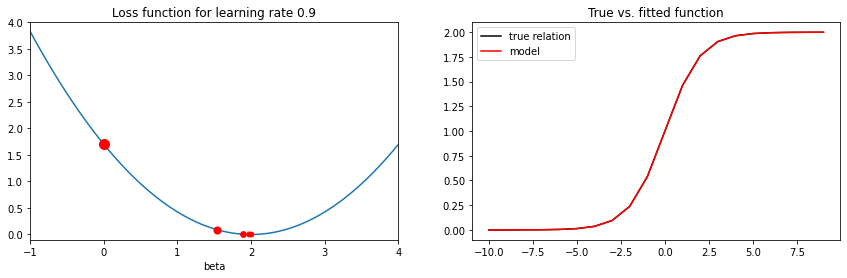

##### high learning rate #####


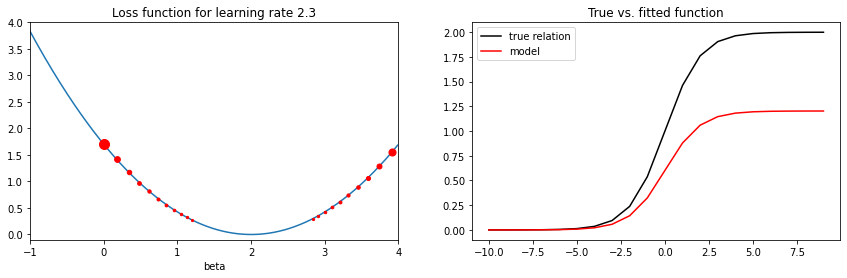

##### low learning rate #####


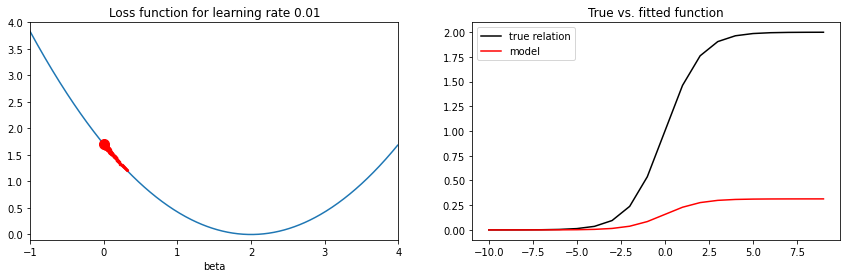

In [10]:
print('##### good learning rate #####')
grad_desc(beta_ini = 0, lrate=0.9, n_epochs=20)
print('##### high learning rate #####')
grad_desc(beta_ini = 0, lrate=2.3, n_epochs=20)
print('##### low learning rate #####')
grad_desc(beta_ini = 0, lrate=0.01, n_epochs=20)